**NL2DS - Winter 2024**

**Assignment 4 -- Psycholinguistic data, sound symbolism, regression, classification**

Name: **Tess Gompper**

Student ID: **260947251**

# Instructions

This is a long homework, consisting of 72 points + 9 extra credit points.  Different problems/questions will be easier for students with more programming versus more linguistics experience.

**The homework will be graded out of 56 points**.  Thus, you do not need to actually complete the whole homework to get full credit, and are welcome to skip problems/questions.  (However, note that some problems/questions require answering certain earlier problems/questions.)

There are two types of exercise:

* "Problems" require writing code.  
  * Replace `# Put your answer here` with your answer.  
  * The code block should run when all code above it in this file has also been run.  
  * If you skip some problems, it's your responsibility to make sure that all code blocks which you filled out still run.
* "Questions" require writing text.  Replace "**put your answer here**" with your answer.

For "Problems":
* <font color='red'>**Most code you'll need to complete the problems (about 80%) involves copying and modifying code from the CoLab notebooks on Regression, Classification, and Tree Methods.**</font>  
  * Make sure you are very familiar with these notebooks and the code they contain.
  *  Every `# Put your answer here` can be solved by a few lines of code, often 1-2 lines.  
  * <font color='red'>**Do not reimplement any major functionality, such as train/test splits, calculating $R^2$, etc.**</font>
* Following the contents of these CoLab notebooks, you should:
  * Use `sklearn` functionality as much as possible for machine learning tools. (For example, do not fit a linear regression in Part 1 problems using another Python package.)
  * Use `pandas` functionalty as much as possible for basic data manipulation and analysis.
* For all commands that involve randomness (fitting a regression, doing a train/test split, etc.), **please use `random_state=42` as an argument**. You will not lose points for not doing this, but using a fixed random seed will make your assignment easier to grade.
* Do not delete any code.  Only add code by replacing `# Put your answer here`. This is important for grading.

Please make sure to follow directions carefully, including maximum lengths for "Question" answers. Failure to follow directions may result in partial or no credit for the relevant problem/question.

# Part 1: Regression with psycholinguistic data



The first part of this problem set will examine some *lexical decision* data. You can read about lexical decision experiments in the wikipedia article [here](https://en.wikipedia.org/wiki/Lexical_decision_task). (The dataset also contains so-called *speeded naming* data. You can read about that in the speeded naming section of the first paper.)

The collection of the lexical decision data is originally described in:

Balota, D. A., Cortese, M. J., Sergent-Marshall, S. D., Spieler, D. H., and Yap, M. J. (2004). [Visual word recognition of single-syllable words](https://drive.google.com/file/d/1TkFrg1jg0AK-9ZnKU5YXNVubdVUeNXbL/view?usp=sharing/). *Journal of Experimental Psychology: General*, 133(2):283–316.

In the following paper, this data was reanalyzed using some new features (predictors).

R. H. Baayen, L. Feldman, and R. Schreuder. [Morphological Influences on the Recognition of Monosyllabic Monomorphemic Words](https://drive.google.com/file/d/1USv3o6PXzocFtSggbcFn2fxYYrJ-pBcI/view?usp=sharing). *Journal of Memory and Language*, 53:496– 512, 2006.

This data is discussed in Harald Baayen's book on linguistic data analysis.

Baayen, R. H. (2008). [Analyzing Linguistic Data: A practical introduction to statistics](https://drive.google.com/file/d/1RnQLXbzMARsEm8s8PFTYiSlaMc-vZ8Xa/view?usp=sharing). Cambridge University Press.

Our data file, `english_a4.csv`, was derived from the original data available as as the `english` dataframe of the [languageR package](https://cran.r-project.org/web/packages/languageR/index.html/).

Copy the data to your Drive folder from [here](https://drive.google.com/file/d/1_MgHNXmCiB6bu2PNAaFBYO0rubksw5oF/view?usp=drive_link).


In [1]:
# throws an error if your Drive folder doesn't contain english_a4.csv
from google.colab import drive
drive.mount('/content/drive/')
!ls "/content/drive/My Drive/english_a4.csv"


Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).
'/content/drive/My Drive/english_a4.csv'


## Problem 1 (2 points)

Use [Pandas](https://pandas.pydata.org/docs/user_guide/index.html) to:

* Read the CSV file into a DataFrame called `english`.
* "Display" the dataset, similarly to how we've examined datasets in CoLab notebooks.  The command you use should print the number of rows and columns at the end.




In [2]:
import pandas as pd

# Problem 1:

english=pd.read_csv("/content/drive/My Drive/english_a4.csv")
display(english)

,RTlexdec,RTnaming,Word,Familiarity,AgeSubject,WordCategory,WrittenFrequency,WrittenSpokenFrequencyRatio,FamilySize,DerivationalEntropy,...,ConfbN,NounFrequency,VerbFrequency,CV,Obstruent,Frication,Voice,FrequencyInitialDiphoneWord,FrequencyInitialDiphoneSyllable,CorrectLexdec
0,6.543754,6.145044,doe,2.37,young,N,3.912023,1.021651,1.386294,0.14144,...,8.833900,49,0,C,obst,burst,voiced,10.129308,10.409763,27
1,6.304942,6.143756,stress,5.60,young,N,6.505784,2.089356,1.609438,0.06197,...,5.817111,565,473,C,obst,frication,voiceless,12.422026,13.127395,30
2,6.424221,6.131878,pork,3.87,young,N,5.017280,-0.526334,1.945910,0.43035,...,2.564949,150,0,C,obst,burst,voiceless,10.048151,11.003649,30
3,6.450597,6.198479,plug,3.93,young,N,4.890349,-1.044545,2.197225,0.35920,...,0.000000,170,120,C,obst,burst,voiceless,11.796336,12.163092,26
4,6.531970,6.167726,prop,3.27,young,N,4.770685,0.924801,1.386294,0.06268,...,2.197225,125,280,C,obst,burst,voiceless,11.991567,12.436772,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4561,6.753998,6.446513,jag,2.40,old,V,2.079442,-1.686399,1.386294,0.30954,...,0.000000,10,7,C,obst,frication,voiced,8.311644,8.390041,29
4562,6.711022,6.506979,hash,3.17,old,V,3.663562,0.436718,1.609438,0.15110,...,0.693147,38,7,C,obst,frication,voiceless,12.567203,12.665546,29
4563,6.592332,6.386879,dash,3.87,old,V,5.043425,0.504395,1.945910,0.63316,...,0.693147,113,231,C,obst,burst,voiced,8.920923,9.287764,29
4564,6.565561,6.519884,flirt,4.97,old,V,3.135494,0.062801,1.945910,0.99953,...,4.304065,10,66,C,obst,frication,voiceless,10.425639,10.932142,29


## Question 1 (3 points)

You'll first familiarize yourself with the dataset by briefly examining the two papers above.

First, read the Wikipedia article on lexical decision, and briefly explain the lexical decision experimental task.  Your answer should address: why do experimenters use this task, what is being measured, and how are conclusions reached on the basis of the results?

**Q1: The lexical deicision exprimental task is used by experimenters to study how quickly particiaptns acan accurately eidentify a sound/stimulus as a word or non-word and to study semantic memory and lexical access. Two things are typically measured in this task, reaction time and accuracy rates of participants. Experimenters analyse reaction times to draw conclusiomns on cognitive processes involved with lexical access and word recognition.**

Now let's turn to the two research papers: Balota et al. (2004) and Baayen et al. (2006).

Start with the earlier paper then move on to the later paper. Note these two papers are long and use a lot of technical jargon from the field of psycholinguistics. *Reading each paper carefully would take several hours and you probably would not be able to understand everything unless you have previous familiarity with experimental psychology.*  This is not the goal of this part of the assignment.  The goal is to just familiarize yourself as efficiently as possible with what some of the columns in the data set mean. An important skill in data science is quickly evaluating the high level idea and questions studied in a paper and finding the places where quantitites are defined, without doing a careful reading.

A good way to approach this is to first read the abstract, the introduction and the conclusion and then have a look at the figures, always keeping in mind the data from the CSV above and trying to find interpretations for the various columns. Don't get stuck on stuff you don't understand unless you are pretty sure you need to understand it to answer the question.

Focus on figuring out where you can find the relevant information to answer the following questions.

## Question 2 (2 points)

In these studies, using this dataset, various regression models are used to analyze the experimental data. What variable or variables were measured in these studies that corresponds to $\mathbf{y}$ in our notation from class (i.e., the quantities to be predicted) and which column or columns in the dataset have these values?

**Q2: The variables that correspond to y are the lexical decision latency (LDT) reaction times and the naming reactiong times. These variables correspond to the columns "RTlexdec" and "RTnaming" in the dataset.**




## Question 3 (4 points)

In both papers a number of different quantities are used as predictors (or "features") for the experimental measures. These correspond to the columns of our $\mathbf{X}$ matrix from class, e.g. when we considered linear regression.

 Note that between these two papers there are a lot of variables, and this a lot of columns in the table. Please determine the meaning of the following features: `Familiarity`, `AgeSubject`, `WordCategory`, `WrittenFrequency`, `WrittenSpokenFrequencyRatio`, `FamilySize`, `InflectionalEntropy`, `LengthInLetters`, `Voice`.  You will be graded on a random subset of your descriptions (about half).
  




**Q3:**
*   **Familiarty -  the degree to which participants are acquainted with or recognize a given word.**
*   **AgeSubject - whether each subject is 'young' or 'old'**
*   **WordCategory - the grammatical category of a word, e.g. N for noun or V for verb**
*   **WrittenFrequency - the frquency of words in an 18 million word corpus**
*   **WrittenSpokenFrequencyRatio - normalized difference between written frequency of words and spoken freqeuncy**
*   **FamilySize - the number of complex word types in which the given word occurs as a constituent.**
*   **InflectionEntropy - a parallel entropy measure for a word’s inflec-
tional paradigm, a means to gauge the relevance of the inflectional variants.**
*   **LengthInLetters - length of a given word in number of letters**
*   **Voice - whether the first phoneme of the word was voiced or
voiceless.**




For each of these predictors, think about: how would you intuitively expect it to relate to the reactions times in the $\mathbf{y}$ variables? **This is not a graded question**, but it is referred to below.

**(optional) put your answer here**

## Problem 2 (3 points)

The largest effect in this data is age: younger participants have lower reaction times. Some predictors' effects may in fact differ between younger and older participants. To abstract away from this for this assignment, we will restrict to just data from younger participants.

We will also abstract away from the fact that a couple of the predictors here, `WordCategory` and `Voice`, are categorical. Instead we'll code them as 0/1 valued, so that:

* `WordCategory` = *N* / *V* becomes 0/1
* `Voice` = *voice* / *voiceless* becomes 0/1

Let's simplify the dataset as follows, saving to a new dataframe called `english_young`:

* Drop rows which don't correspond to young speakers, then drop the column indexing whether speakers are old or young.
* Keep the column for lexical decision RT, which will be our $\mathbf{y}$, and drop any other columns that are possible outcome variables (from your answer to Question 2).
* Keep the column for `Word`, which tells us what word (of English) each row corresponds to.
* Recode the `WordCategory` and `Voice` columns as numeric, as specified above.
* Keep columns corresponding to the remaining predictors from Question 3.
* Drop all other columns.

Then, print a one-line message giving the number of rows and columns in `english_young`.

In [3]:
# Problem 2:


## simplify data

# subset to young speakers

english_young = english[english['AgeSubject'] != 'old']
english_young = english_young.drop("AgeSubject", axis='columns')

# restrict to certain columns

english_young = english_young.drop('RTnaming', axis='columns')

english_young = english_young.drop(['DerivationalEntropy', 'NumberSimplexSynsets', 'NumberComplexSynsets', 'Ncount', 'MeanBigramFrequency',
                    'FrequencyInitialDiphone', 'ConspelV', 'ConspelN', 'ConphonV', 'ConphonN', 'ConfriendsV', 'ConfriendsN',
                    'ConffV', 'ConffN', 'ConfbV', 'ConfbN', 'NounFrequency', 'VerbFrequency', 'CV', 'Obstruent', 'Frication',
                    'FrequencyInitialDiphoneWord', 'FrequencyInitialDiphoneSyllable', 'CorrectLexdec'],axis='columns')

## map categorical predictors to numeric
category_to_number_dict = {'N': 0,'V': 1, 'voiced': 0,'voiceless': 1}

english_young['WordCategory'] = english_young['WordCategory'].map(category_to_number_dict)
english_young['Voice'] = english_young['Voice'].map(category_to_number_dict)

# english_young['WordCategory'].map(category_to_number_dict)
# english_young['Voice'].map(category_to_number_dict)

## print message

rows, cols = english_young.shape

print("Rows: "+ str(rows) + ", Columns: " + str(cols))

#######
display(english_young)

Rows: 2283, Columns: 10


,RTlexdec,Word,Familiarity,WordCategory,WrittenFrequency,WrittenSpokenFrequencyRatio,FamilySize,InflectionalEntropy,LengthInLetters,Voice
0,6.543754,doe,2.37,0,3.912023,1.021651,1.386294,0.02114,3,0
1,6.304942,stress,5.60,0,6.505784,2.089356,1.609438,1.44339,6,1
2,6.424221,pork,3.87,0,5.017280,-0.526334,1.945910,0.00000,4,1
3,6.450597,plug,3.93,0,4.890349,-1.044545,2.197225,1.75393,4,1
4,6.531970,prop,3.27,0,4.770685,0.924801,1.386294,1.74730,4,1
...,...,...,...,...,...,...,...,...,...,...
3729,6.514031,jag,2.40,1,2.079442,-1.686399,1.386294,1.85123,3,0
3730,6.491376,hash,3.17,1,3.663562,0.436718,1.609438,0.77890,4,1
3731,6.360318,dash,3.87,1,5.043425,0.504395,1.945910,1.65739,4,0
3732,6.319923,flirt,4.97,1,3.135494,0.062801,1.945910,1.75885,5,1


We now use the [Seaborn library](https://seaborn.pydata.org/) to produce a set of plots between (see `pairplot`) all the variables in the dataset:

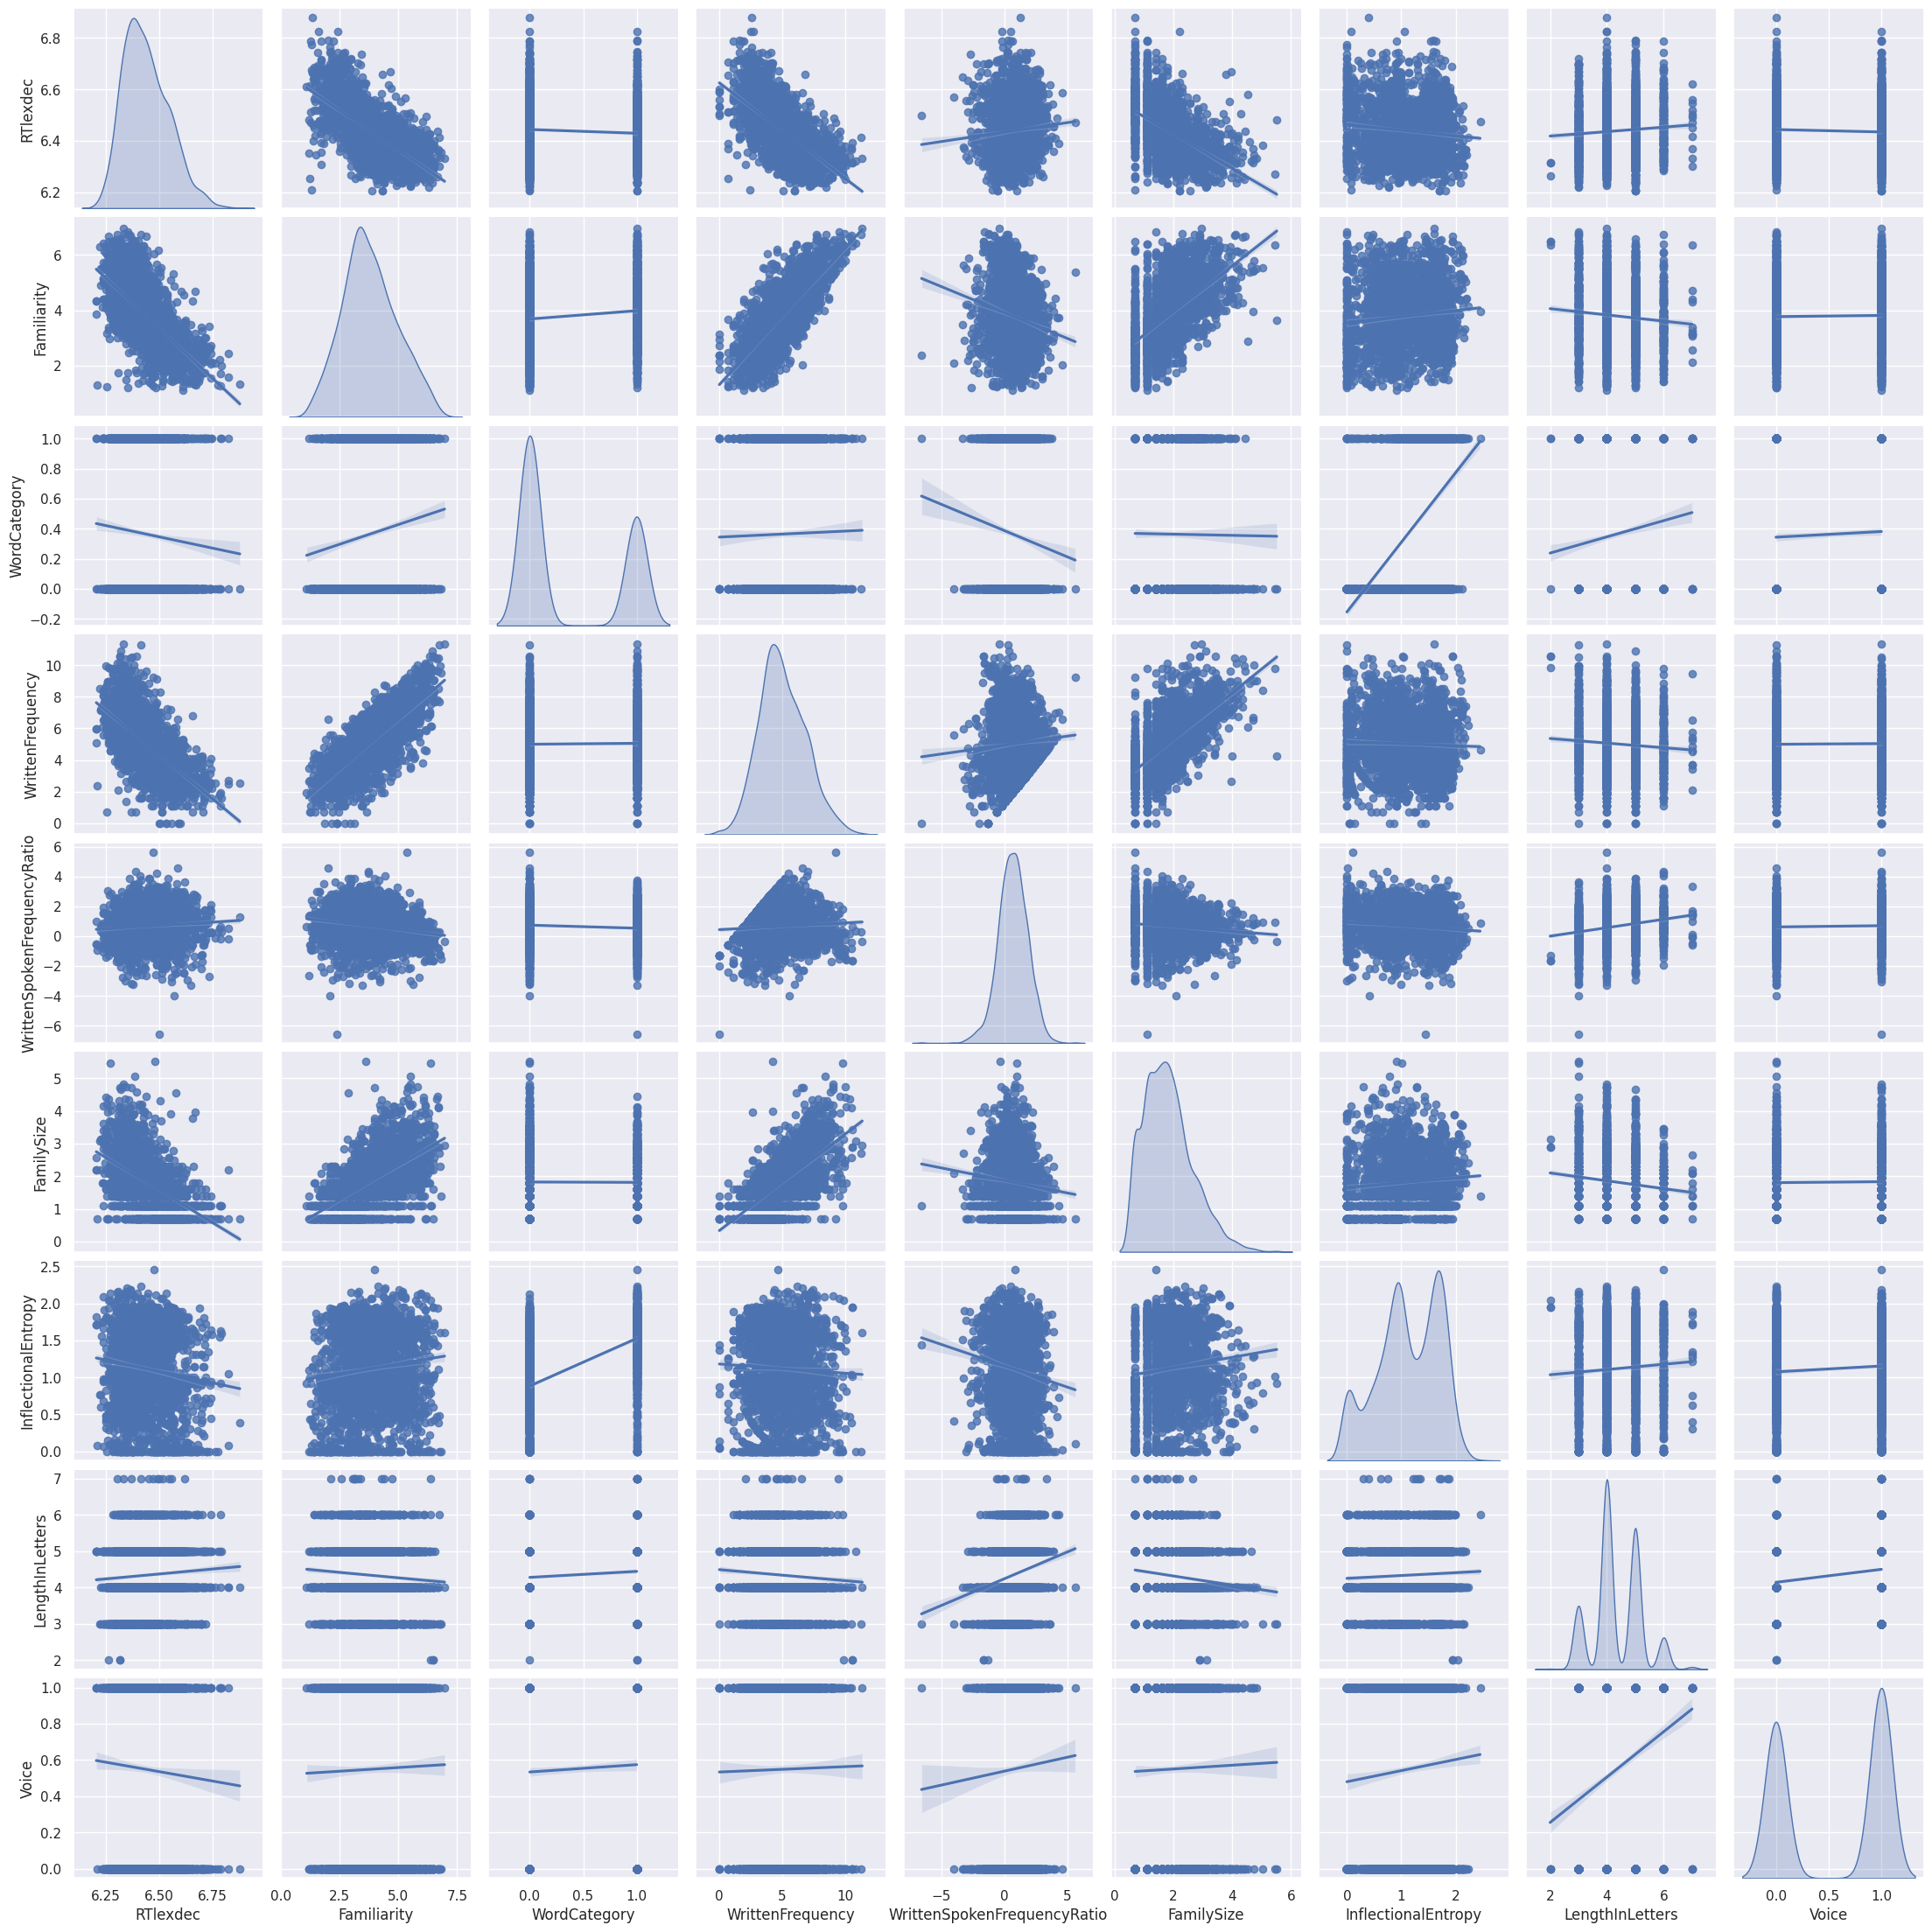

In [15]:
import seaborn as sns; sns.set()
## kind = 'reg': add linear trend lines
## diag_kind = 'kde' : show density plots for each predictor in diagonal panels.
sns.pairplot(english_young, kind = 'reg', diag_kind='kde')

Do the panels in the first row show the patterns you predicted in the ungraded question above (positive vs. negative slope of the line)?

## Problem 3 (4 points)

Let's examine the relationship between the written frequency of a word and its
lexical decision time.  

When exmaining relationships between two variables, especially when we're not sure if they're linear, it's useful to look at a *locally-smoothed regression line* that relates the $x$ and $y$ axes of a plot. This is a kind of regression model where the function is refit localy for many subsets of the data then a smooth line is interpolated between these points. One standard technique for this is known as *locally weighted scatterplot smoothing* or [LOWESS](https://en.wikipedia.org/wiki/Local_regression).

When examining large datasets like this one, it's important to format how the data is displayed so that both the empirical distribution of data and the fitted trend  (here, linear or LOWESS line) are legible, meaning:
* Points should not overlap too much
* Neither points nor the trend is formatted such that the other is obscured.

Other desiderata for any plot are:
* x and y axes should be clearly labeled (with interpretable labels, not variable names like `RTlexdec`)
* Text should be legible: appropriately-sized fonts, no overlapping text.

Use functions from matplotlib and seaborn to make **legible** plots meeting the specifications above:

* Make a 1 x 2 grid of plots
* In the left plot, put a scatterplot of written frequency (x-axis) and lexical decision RT (y-axis), with a superimposed linear trend (line of best fit).  
* In the right plot, put a scatterplot of written frequency (x-axis) and lexical decision RT (y-axis), with a superimposed LOESS of best fit.
* In both plots: adjust the size, transparency, and/or color of the lines and/or dots as appropriate.

You may find the Seaborne help pages useful, such as [this one](https://seaborn.pydata.org/tutorial/regression.html).  Some possible functions to use:

* `plt` and `plt.subplots` from `matplotlib.pyplot`
* `regplot` from `seaborn`




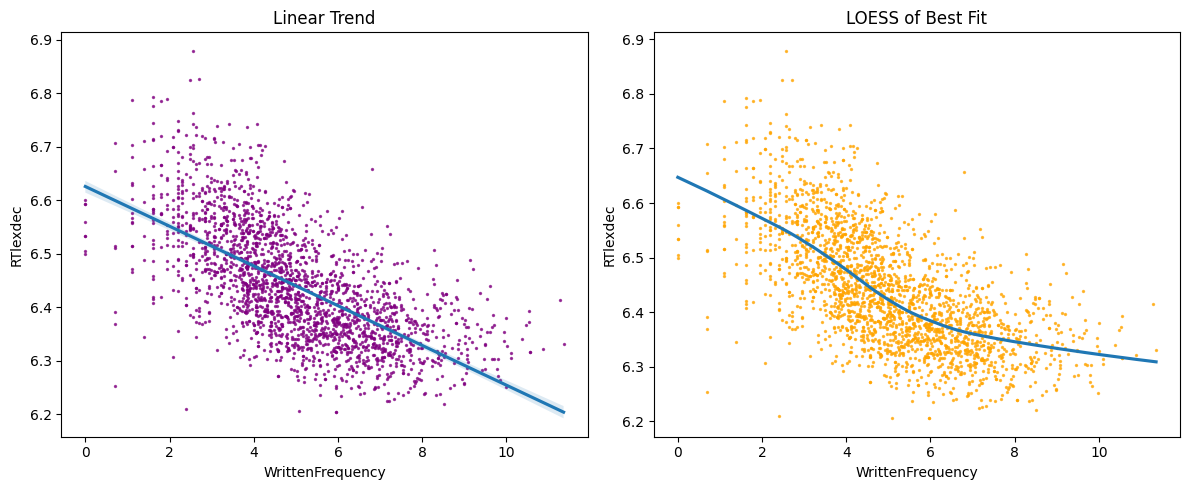

In [4]:
#Problem 3:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a 1x2 grid of plots
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Left plot: Scatterplot with linear trend
sns.regplot(x=english_young['WrittenFrequency'], y=english_young['RTlexdec'], ax=axes[0], scatter_kws={'alpha': 0.7, 's': 2, 'color': 'purple'})
axes[0].set_title('Linear Trend')

# Right plot: Scatterplot with LOESS of best fit
sns.regplot(x=english_young['WrittenFrequency'], y=english_young['RTlexdec'], lowess=True, ax=axes[1], scatter_kws={'alpha': 0.7, 's': 2, 'color': 'orange'})
axes[1].set_title('LOESS of Best Fit')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

## Question 5 (2 points)

Based on these two plots, do you think that a linear model represents the relationship between written frequency and reaction time?  Why/why not? If we fit a polynomial approximation of order $k$ to the LOESS curve, what $k$ do you think would be most appropriate? You can specify up to two possible $k$ values (e.g. "k = 3" or "$k =$ 1--2" is OK, "$k =$ 3, 5 or 9" is not).  Your answer should be verbal, with your guess at $k$ purely based on visual inspection.

NB: A line is a polynomial.



**Q5: I do not think that a linear model represents the relationship between written frequency and reaction time because the LOESS curve shows a better fit and we can clearly see that a curved polynomial would fit the relatioship more accuratgley. k = 1--2**

## Question 6 (2 points)

When modeling any relationship in data, it's important to think not just about what quantitative model (e.g. a line vs. a LOESS curve) fits best, but what  relationships are possible given domain-specific knowledge.

Let's consider the linear fit from this perspective.  Think about what a linear fit predicts for reaction time as written frequency is changed, and what people are doing in a lexical decision task. Is there any issue (or multiple issues) that tells us that the true relationship cannot be linear? Explain.

**Q6: One issue that tells us that the true relationship cannot be linear is that of dependence between observations/words. A linear model would assume that all obsvervations are independent but in the lexical decision tasks, previosuly heard words can introduce dependencies and change results in differrent ways for different participants, as discussed with the doctor/nurse example on the wikipedia page.**





# Problem 6 (2 points), Problem 7 (4 points)

We'll now check your intuition from above by examining more complex models of the relationship between frequency and lexical decision time, similarly to cases in the Regression CoLab notebook considered in class.

Fill in the following code for fitting polynomial regressions of degree $k$, choosing the best $k$, and visualizing the resulting relationship.

The one difference from the code considered in class is that we will consider two measures of goodness of fit:

1. $R^2$ on the test set
2. Bayesian Information Criterion (BIC) on the test set

Note that as defined here, higher BIC = better model.

*Hint*: Do not implement your own function for train/test splitting, or for computing polynomial components.


Model class: Linear Regression
	Degree 1
		Train R^2: 0.43170183394771244
		Test R^2: 0.34017204076755403
		BIC: -2238.0973155774836
	Degree 2
		Train R^2: 0.4544101475799237
		Test R^2: 0.3383443008735334
		BIC: -2236.8331642443954
	Degree 3
		Train R^2: 0.4706396456521179
		Test R^2: 0.358247345057783
		BIC: -2250.7910282075377
	Degree 4
		Train R^2: 0.47883643586901936
		Test R^2: 0.3685663572489709
		BIC: -2258.199043581865
	Degree 5
		Train R^2: 0.47884757551731016
		Test R^2: 0.36852213790189103
		BIC: -2258.167040956905
	Degree 6
		Train R^2: 0.47963757434437126
		Test R^2: 0.371315648066495
		BIC: -2260.1931868327324
	Degree 7
		Train R^2: 0.4796721211551489
		Test R^2: 0.3717878525391659
		BIC: -2260.5365682555744
	Degree 10
		Train R^2: 0.4798924305841902
		Test R^2: 0.37425499865855283
		BIC: -2262.3348549553652
	Degree 25
		Train R^2: 0.3437647673147428
		Test R^2: 0.28013117488394534
		BIC: -2198.2972427655136


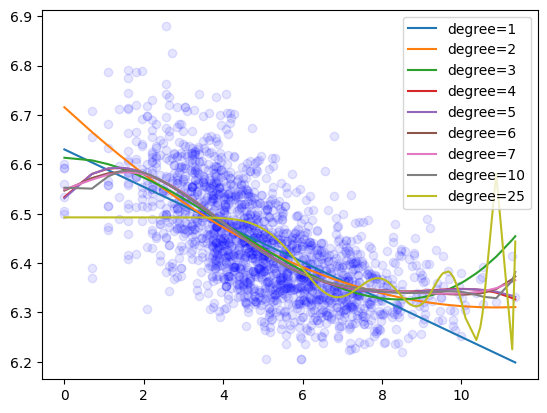

In [5]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np


from sklearn.metrics import mean_squared_error

def bic(X, y, model):
  # number of observations
  n = X.shape[0]

  # number of parameters
  k = X.shape[1] + 1

  # calculate Residual Sum of Squares)
  RSS = mean_squared_error(y, model.predict(X)) * n

  BIC = n * np.log(RSS / n) + k * np.log(n)

  return(BIC)



# Problem 6:  preprocessing
# starting from english_young:
# - Set up a predictor matrix X for features -- considering just the written frequency feature
# - Set up the outcome vector, y.

X = english_young[['WrittenFrequency']]
y = english_young['RTlexdec']

# - Split the data into train and test subsets, with 20% of the data in test.
# This should define objects called X_train, X_test, y_train, and y_test.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

######
# Sets up a scatterplot of training data:
X_plot = np.linspace(0, 10,5000).reshape(-1, 1)
plt.scatter(X_train, y_train, color='blue', alpha=0.1)

######

## Problem 7: polynomial regression + visualization

print("Model class: " + "Linear Regression")
for degree in [1,2,3,4,5,6,7,10,25]:
  # - fit a polynomial regression model with this degree, on the training data
  # it should be named 'model'.

  r=LinearRegression()
  model=make_pipeline(PolynomialFeatures(degree), r)
  model.fit(X_train, y_train)

  print("\tDegree " + str(degree) +"\n\t\tTrain R^2: "+ str(model.score(X_train,y_train)))
  print("\t\tTest R^2: "+ str(model.score(X_test,y_test)))
  print("\t\tBIC: "+ str(bic(X_test, y_test, model)))


  # add a line to the plot for this model, showing predictions for the training data
  y_predictions = model.predict(X_train.sort_values("WrittenFrequency"))
  plt.plot(X_train.sort_values("WrittenFrequency"), y_predictions, label='degree={0}'.format(degree))
  #plt.plot(X_test.ravel(), model.predict(X_test), label='degree={0}'.format(degree))

plt.legend()
plt.show()

## Question 6 (3 points)

Which degree polynomial provided the best fit to this dataset based on $R^2$?  Based on BIC?  Which answer makes more sense given your answers to Questions 5 and 6?  Is the relationship between frequency and lexical decision time linear or nonlinear?

**Q6: Based on $R^2$, degree 10 provides the best fit, as it is the largest $R^2$value. Based on BIC, degree 25 provides the best fit. Given my ansers to questions 5 and 6, degree 10 makes more sense as it is closer to 2. The relationship between frequency and lexical decision time is nonlinear.**

## Problem 8 (4 points)


Let's now fit a model using all predictors, including a polynomial effect of `WrittenFrequency`, of the degree you chose in Question 6.

For interpreting the model coefficients, it's useful to first standardize both $y$ and the columns of X.  

Prepare the data for this model:

*Hint*: Do not implement your own function for z-scoring each column of a DataFrame.



In [12]:
# Problem 8

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

## define X such that the columns are predictor variables in english_young,
## with columns added for polynomial features.
##
## for example, if you found in Question 6 that k = 4, then you'd add a
## columns here called WrittenFrequency2, which is the square of the WrittenFrequency column,
## and similarly for WrittenFrequency3 and WrittenFrequency4

X = english_young[['WrittenFrequency', 'Familiarity', 'WordCategory', 'WrittenSpokenFrequencyRatio',
                   'FamilySize', 'InflectionalEntropy', 'LengthInLetters', 'Voice']]
# k = 10
X['WrittenFrequency2'] = X['WrittenFrequency']**2
X['WrittenFrequency3'] = X['WrittenFrequency']**3
X['WrittenFrequency4'] = X['WrittenFrequency']**4
X['WrittenFrequency5'] = X['WrittenFrequency']**5
X['WrittenFrequency6'] = X['WrittenFrequency']**6
X['WrittenFrequency7'] = X['WrittenFrequency']**7
X['WrittenFrequency8'] = X['WrittenFrequency']**8
X['WrittenFrequency9'] = X['WrittenFrequency']**9
X['WrittenFrequency10'] = X['WrittenFrequency']**10

y = english_young[['RTlexdec']]

## Now: define X_std and Y_std:
## - X_std is the X matrix above, but with each column z-scored
## - y_std is the same as y above, but z-scored

X_std = scaler.fit_transform(X)
y_std = scaler.fit_transform(y)

# - Split the data into train and test subsets, with 20% of the data in test.
# This should define objects called X_train, X_test, y_train, and y_test.

X_train, X_test, y_train, y_test = train_test_split(X_std, y_std, test_size=0.2, random_state=42)




<ipython-input-12-40346b4c647c>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['WrittenFrequency2'] = X['WrittenFrequency']**2


# Problem 9 (3 points)

There are many predictors here, some of which probably don't actually have non-zero effects.  We'll fit a Lasso regression, which should perform as well as linear regression, while allowing us to perform variable selection.  

In [13]:
## Problem 9

# Fit a Lasso linear regression to X_std and y_std, with alpha parameter of 0.02.
# (you can just assume this is a good alpha).  Call this model mod_lasso
from sklearn.linear_model import Lasso

r=Lasso(alpha = 0.02)
mod_lasso=make_pipeline(r)
mod_lasso.fit(X_train, y_train,)


# Print the R^2 of this model on the train and test set

print("\tDegree " + str(2) +"\n\t\tTrain R^2: "+ str(mod_lasso.score(X_train,y_train)))
print("\t\tTest R^2: "+ str(mod_lasso.score(X_test,y_test)))
print("\t\t"+str(r.coef_))



	Degree 2
		Train R^2: 0.5418438484933765
		Test R^2: 0.43630968046344687
		[-0.43459132 -0.37145309  0.          0.02314771 -0.09130013 -0.04976285
  0.         -0.00363416 -0.          0.          0.          0.10860879
  0.087164    0.          0.          0.          0.        ]


## Problem 10 (3 points)

Print out a pandas DataFrame summarizing the coefficient value for each predictor for this model, called `coefficients_with_features`. Column 1 should be predictor names and Column 2 coefficient values.  The rows of the table should be sorted in order of coefficient magnitudes (= absolute values).

In [14]:
## Problem 10

# extract model coeffs
coefficients = r.coef_

# make the dataframe
feature_names = ['WrittenFrequency', 'Familiarity', 'WordCategory', 'WrittenSpokenFrequencyRatio',
                  'FamilySize', 'InflectionalEntropy', 'LengthInLetters', 'Voice', 'WrittenFrequency2',
                 'WrittenFrequency3', 'WrittenFrequency4', 'WrittenFrequency5', 'WrittenFrequency6',
                 'WrittenFrequency7', 'WrittenFrequency8', 'WrittenFrequency9', 'WrittenFrequency10']
coefficients_with_features = pd.DataFrame(zip(feature_names, coefficients), columns=['Feature', 'Coefficient'])
coefficients_with_features['Coefficient'] = coefficients_with_features['Coefficient'].abs()

# sort the DataFrame by coefficient magnitude

coefficients_with_features = coefficients_with_features.sort_values(['Coefficient'], ascending=False)

print(coefficients_with_features)

                        Feature  Coefficient
0              WrittenFrequency     0.434591
1                   Familiarity     0.371453
11            WrittenFrequency5     0.108609
4                    FamilySize     0.091300
12            WrittenFrequency6     0.087164
5           InflectionalEntropy     0.049763
3   WrittenSpokenFrequencyRatio     0.023148
7                         Voice     0.003634
15            WrittenFrequency9     0.000000
14            WrittenFrequency8     0.000000
13            WrittenFrequency7     0.000000
8             WrittenFrequency2     0.000000
10            WrittenFrequency4     0.000000
9             WrittenFrequency3     0.000000
6               LengthInLetters     0.000000
2                  WordCategory     0.000000
16           WrittenFrequency10     0.000000


## Question 7 (2 points)

According to the Lasso regression:
* Which two predictors have the largest effects?
* Which predictors are selected as having no effect?



**Q7: WrittenFrequency and Familiarty have the largest effects. WrittenFrequency2, WrittenFrequency3, WrittenFrequency4, WrittenFrequency7, WrittenFrequency8, WrittenFrequency9, WrittenFrequency10, LengthInLetters, and WordCatgegory have no effect.**

## Question 8 (3 points)

You should find that two of the predictors that have large effects are very correlated (see the empirical plot above). Call these $x_1$ and $x_2$.  What are $x_1$ and $x_2$? (Choose the most-correlated pair of predictors.)

Suppose that in reality, only $x_1$ (causally) affects `RTlexdec`, and $x_2$ just looks correlated with `RTlexdec` because it's highly correlated with $x_1$. Why hasn't Lasso selected $x_2$ as having no effect (and will not do so, even if we increase `alpha`)?

**Q8: $x_1= WordFrequency$ and $x_2= Familiarty$. Lasso hasn't selected $x_2$ as having no effect because it may have a non-zero contribution, as the correlation is not completely perfect, and Lasso will retain it in the model. Even if alpha increases, it is multiplied by $x_2$, which is not zero, so it will remain selected as having an effect.**

## Question 9 (3 points)

* Why is $R^2$ on the test set lower than on the training set?
* If the `alpha` parameter were increased, would we expect the $R^2$ on the test set to increase or decrease? Do we expect more or fewer predictors to be selected as having no effect? Explain.


**Q9: $R^2$ is lower on the test set than on the training set because of overfitting, which is when the model learns the training data well and struggles to generalize to new data. If the `alpha` parameter was increased, we might expect an increase in $R^2$ because the reduction in the number of predictors with non-zero coefficients can mitigate overfitting, however it could potentially lead to a decrease in $R^2$ if some relevant predictors are incorrectly pushed to zero. We expect more predictors to be selected as having no effect, as higher alpha values push more coefficients towards zero.**

# Part 2: Classification with Pokémon data

This part uses Pokémon name data to examine sound symbolism: to what extent are properties of a Pokémon predictable from its name?  We will be considering *evolution*, a fundamental division between Pokémon characters.  For our purposes, Pokémon can be either *evolved* or *non-*evolved. (The real story is [more complicated](https://bulbapedia.bulbagarden.net/wiki/Evolution), as many of you know, but this is a reasonable first approximation.)

 An interesting aspect of Pokémon for linguistic research is that complete Pokémon name sets exist in different languages, giving us multiple datasets to examine sound symbolism and to what extent it looks similar across languages.

In class we examined Pokémon evolution status as a classification problem for English names .  In this homework, we'll do the same for Mandarin Chinese names (henceforth "Mandarin").

This data comes from a recent paper:

Kilpatrick, A., Ćwiek, A., and Kawahara, S. (2023). [Random forests, sound symbolism and Pokémon evolution](https://journals.plos.org/plosone/article?id=10.1371/journal.pone.0279350).
PLoS ONE 18(1): e0279350. https://doi.org/10.1371/journal.pone.0279350

This paper considers Korean, Japanese, and Mandarin datasets, all available in this [OSF project](https://osf.io/pe24w/?view_only=02e9327a7bd54b9280b57434a90ed83a).  

The datafile we are using, `chinese_pokemon.csv`, is derived from the data on this site.

Copy the data to your Drive folder from [here](https://drive.google.com/file/d/1jA5M38-v7gNzQbacihnp7aItAycM_89p/view?usp=sharing).


In [16]:
# throws an error if your Drive folder doesn't contain chinese_pokemon.csv
from google.colab import drive
drive.mount('/content/drive/')
!ls "/content/drive/My Drive/chinese_pokemon.csv"


Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).
'/content/drive/My Drive/chinese_pokemon.csv'


First, load the data and take a look:

In [17]:
chinese = pd.read_csv("/content/drive/My Drive/chinese_pokemon.csv")
display(chinese)

,name,length,evolved,flat_tone,rising_tone,falling_rising_tone,falling_tone,neutral_tone,a,e,...,r,x,h,l,w,q,y,H,hyphen,colon
0,miàowāZǒNzǐ,11,0,1,0,2,1,2,2,0,...,0,0,0,0,1,0,0,0,0,0
1,miàowācǎo,9,1,1,0,1,1,3,3,0,...,0,0,0,0,1,0,0,0,0,0
2,miàowāhuā,9,1,2,0,0,1,3,3,0,...,0,0,1,0,1,0,0,0,0,0
3,xiǎohuǒlóN,10,0,0,1,2,0,3,1,0,...,0,1,1,1,0,0,0,0,0,0
4,huǒkǒNlóN,9,1,0,1,2,0,1,0,0,...,0,0,1,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
893,léijíHàilèqí,12,0,0,3,0,2,2,1,2,...,0,0,0,2,0,1,0,1,0,0
894,léijíduólāgē,12,0,2,3,0,0,2,1,2,...,0,0,0,2,0,0,0,0,0,0
895,xuěbàomǎ,8,0,0,0,2,1,2,2,1,...,0,1,0,0,0,0,0,0,0,0
896,líNyōumǎ,8,0,1,1,1,0,1,1,0,...,0,0,0,1,0,0,1,0,0,0


Column meanings:

* `name`: Pokémon's name, in a custom transcription system$^{*}$
* `length`: length of name, in phones
* `evolved`: evolved Pokémon? 0/1 = False/True
* `flat_tone`, `rising_tone`, etc.: number of syllables in the name carrying this tone
* `a`, `i`, `e`, etc: number of times this phone appears in the name

The transcription system used is close to [Pinyin](https://en.wikipedia.org/wiki/Pinyin), but modified so that every phoneme is represented by a single ASCII character---similar to the X-SAMPA system for English used in our `h95.csv` vowels dataset.  (If you are curious / familiar with Mandarin, the system is described on p. 5 of [this document](https://osf.io/32whg?view_only=02e9327a7bd54b9280b57434a90ed83a).)  Some things you may need to know for this homework are:

* Every syllable in Mandarin bears one of 5 tones: flat, rising, falling-rising, falling, or neutral.
* `U` stands for a front rounded vowel (written "ü" in Pinyin)
* `N` stands for the velar nasal, which can only occur at the end of syllables in Mandarin (written "ng" in Pinyin).
* `j` stands for the affricate /tɕ/ (written "j" in Pinyin).
* `y` stands for the glide /j/ (written "y" in Pinyin).




## Problem 11 (2 points)

Prepare the data:

* Make the predictor matrix: a numpy DataFrame `X` which consists of all columns except `name` and `evolved`.
* Make the outcome vector `y`
*  Split the data into train and test subsets, with 20% of the data in test. This should define objects called `X_train`, `X_test`, `y_train`, and `y_test`.


In [35]:
# Problem 11

X = chinese[['length', 'flat_tone', 'rising_tone', 'falling_rising_tone', 'falling_tone', 'neutral_tone', 'a', 'e', 'i', 'o', 'u','U',
             'm','n','N','p','t','k','b','d','g','c','C','z','Z','j','f','s','S','r','x','h','l','w','q','y','H','hyphen','colon']]
y = chinese['evolved']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



We will fit two classification models to this dataset, with the goal of determining which predictors (properties of a Pokémon's name) affect `evolution`.  

Some background on sound symbolism will be useful.  We might hypothesize that "evolved" status would be correlated with some types of sounds which have been found to evoke large size/heaviness/hardness across languages:

* Low vowels, such as `a`: positive correlation
* High vowels, such as `i`: negative correlation
* Back vowels, such as `u`: negative correlation
* Nasal consonants, especially in syllable codas: positive correlation
* Bilabial consonants: negative correlation

One theory underlying such associations is Ohala's *frequency code hypothesis*, which posits that sounds that tend to have higher f0 (pitch) are more associated with greater size/weight/male gender.  

For Pokémon names, it is well known (by players) that:

*  *longer names* are positively correlated with "evolved" status (as well as higher power).  

This pattern seems to be Pokémon-specific sound symbolism.

Interestingly, not much is known about sound symbolism involving tones across languages, including in Mandarin Chinese (the world's most-spoken tone language).

## Problem 12 (3 points)

We will first fit and evaluate a logistic regression model to predict `evolved`.  


In [23]:
# Problem 12

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Fit a logistic regression model, called lr_model, to X_train and y_train.
# Make sure that the model does not use any regularization -- the
# sklearn default includes L2 regularization.

lr_model = LogisticRegression(None)
lr_model.fit(X_train, y_train)


# Calculate the accuracy on the training set and on the test set.
# save these as train_acc and test_acc

train_acc = accuracy_score(y_train, lr_model.predict(X_train))
test_acc = accuracy_score(y_test, lr_model.predict(X_test))

# print these accuracies:
print([train_acc, test_acc])

[0.6504178272980501, 0.5333333333333333]


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## Problem 13 (3 points)

To examine which predictors are important, print a table of coefficients where:
* Each row corresponds to one predictor
* Column 1: predictor names
* Column 2: coeficient values
* Rows sorted by decreasing coefficient _absolute value_.

Fill in the missing parts of code below.

In [26]:
## Problem 13

# make 'feature_names' the names of columns of X_train
# make 'coefficients' a numpy array consisting of the values of the
# coefficients of lr_model

feature_names = ['length', 'flat_tone', 'rising_tone', 'falling_rising_tone',
                  'falling_tone', 'neutral_tone', 'a', 'e', 'i', 'o', 'u','U',
                  'm','n','N','p','t','k','b','d','g','c','C','z','Z','j','f',
                  's','S','r','x','h','l','w','q','y','H','hyphen','colon']
coefficients = lr_model.coef_
coefficients = coefficients[0]
coefficients = np.absolute(coefficients)

#  Make a DataFrame:
coef_table = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients
})

# sort the Dataframe by absolute value of coefficients, then print it.

coef_table = coef_table.sort_values(['Coefficient'], ascending=False)

print(coef_table)

                Feature  Coefficient
38                colon     2.338490
37               hyphen     1.107860
22                    C     0.831922
25                    j     0.761824
11                    U     0.744921
14                    N     0.733298
31                    h     0.652537
33                    w     0.632107
28                    S     0.614161
30                    x     0.475729
23                    z     0.432281
19                    d     0.413481
13                    n     0.413065
24                    Z     0.393468
36                    H     0.386771
26                    f     0.379830
35                    y     0.340867
12                    m     0.339343
32                    l     0.320398
10                    u     0.314034
20                    g     0.279856
27                    s     0.260234
4          falling_tone     0.228936
21                    c     0.216580
7                     e     0.213578
29                    r     0.207018
5

## Question 10 (2 points)

What are the four most important features, going by coefficient values?  Briefly describe what they mean (e.g. `a` would be "number of times 'a' appears in the name").

**Q10:**

*   **colon - number of times ':' appears in the name**
*   **hyphen - number of times '-' appears in the name**
*   **U - number of times 'U' appears in the name**
*   **j - number of times 'j' appears in the name**



# Problem 14 (3 points)

Our second model will be a random forest. Fit a random forest called `rf` to the training data, with the following options:

* Minimum number of samples per split: 5
* Maximum tree depth: 5
* Use OOB score instead of accuracy
* Use 1000 trees

(These options make this particular random forest perform better, and you can just take them as given.)

Then print its accuracy on the train and test set.

In [36]:
## Problem 14

from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=42, max_depth=5, oob_score = True, n_estimators= 1000, min_samples_split = 5)
rf.fit(X_train, y_train)

[rf.score(X_train, y_train), rf.score(X_test, y_test)]


[0.7799442896935933, 0.5944444444444444]

To compute feature importances for this random forest, we'll work from [this sklearn vignette](https://scikit-learn.org/stable/auto_examples/inspection/plot_permutation_importance.html).

We will compute *permutation importance* on a held-out test set, as in the example shown after the paragraph beginning with "As an alternative, the permutation importances of rf are computed on a held out test set..." Read as much of the vignette as necessary to understand what is being done here, and what the boxplots in the following plot mean. (Why does the figure show a range of values for each feature, rather than just a single importance number?)

We adapt the code there to calculate permutation importance and show a plot of horizontal boxplots, like the one shown there:

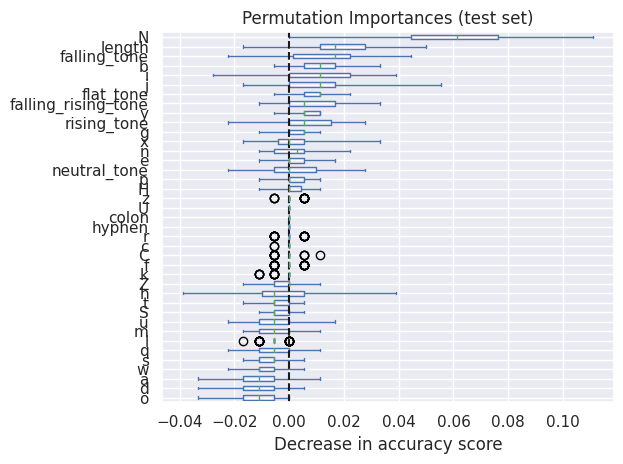

In [37]:
from sklearn.inspection import permutation_importance

# This code will work after you've defined rf, but will take a while to run

## calculate permutation importance
result = permutation_importance(
    rf, X_test, y_test, n_repeats=50, random_state=42, n_jobs=-1
)

## arrange as a dataframe, sorted by importance
sorted_importances_idx = result.importances_mean.argsort()
importances = pd.DataFrame(
    result.importances[sorted_importances_idx].T,
    columns=X.columns[sorted_importances_idx],
)

# plot importances on the test set
ax = importances.plot.box(vert=False, whis=10)
ax.set_title("Permutation Importances (test set)")
ax.axvline(x=0, color="k", linestyle="--")
ax.set_xlabel("Decrease in accuracy score")
ax.figure.tight_layout()

## Question 11 (2 points)

What are the four most important features, going by this plot?  How much do these features overlap with those from Question 9?


**Q11: N, length, falling_tone, and b are the most important features based on this plot. They do not overlap at all with the features from Question 9.**

# Problem 15 (4 points, up to 4 points extra credit)

To get a sense of how each of these features affects `evolved`: for each feature, make four empirical plots: one for each feature, with the feature on the x-axis and % evolved on the y-axis.  These plots should be in a 1x4 grid.

Each plot can just show one point per value of the feature, corresponding to the % of the data with this feature value (e.g. `a` = 2) for which `evolved` is 1.  

Your plots should be **legible**, following the guidelines in Problem 3, though it's not required to show the empirical data in the plots.

*Extra credit*: calculate the error for each % evolved, and showing these on the plots (using 95% confidence intervals).  Add information to the plot showing the empirical data: the number of points with `evolved` = 1 vs. 0 for each feature value. Just using a default scatterplot isn't informative (why?).

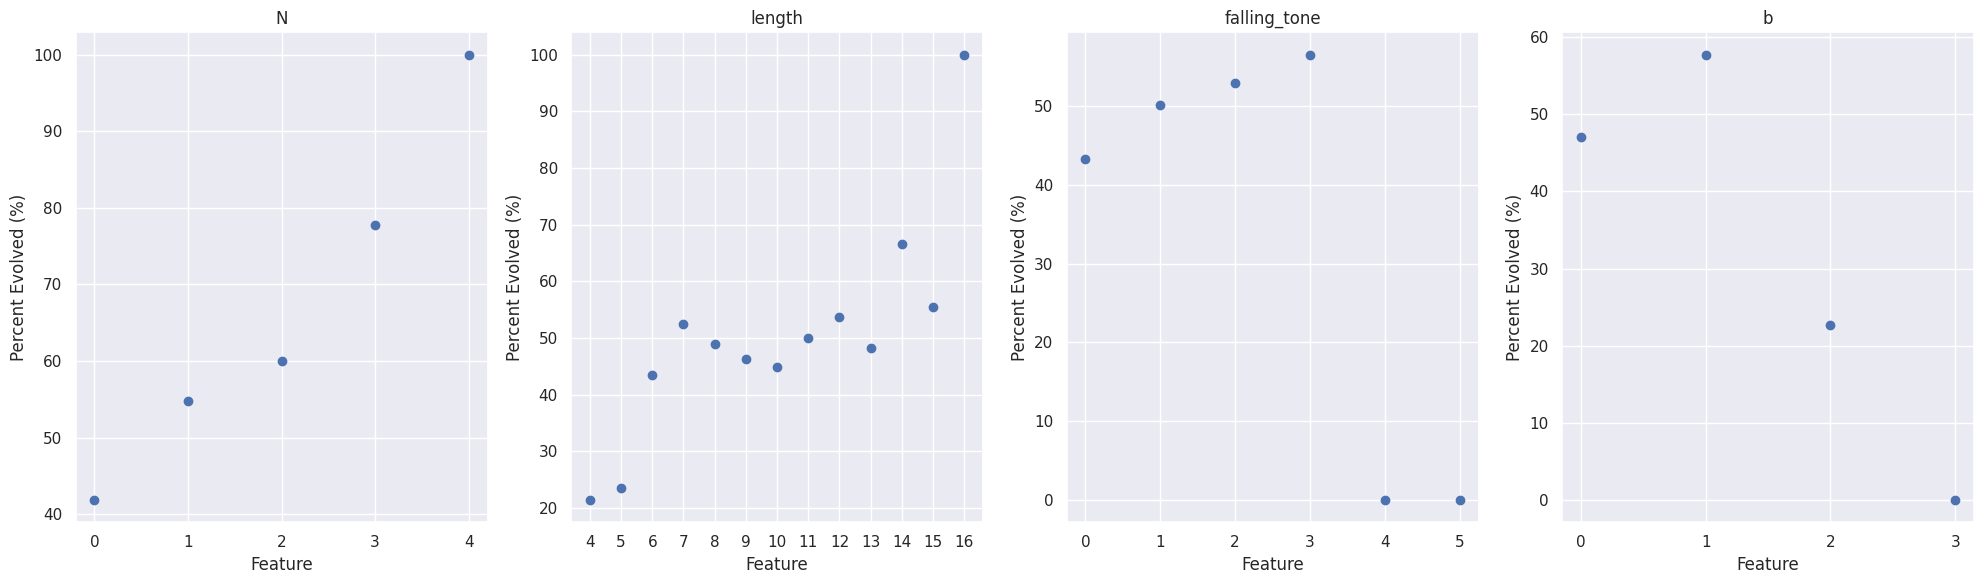

In [40]:
## Problem 15

fig, axes = plt.subplots(figsize=(20, 6), nrows=1, ncols=4)

features = ['N', 'length', 'falling_tone', 'b']
for i in range(4):
  grouped = chinese.groupby(features[i])
  percentage_evolved = grouped['evolved'].mean()*100
  df = pd.DataFrame({features[i]: percentage_evolved.index, 'Percentage_Evolved': percentage_evolved.values})
  axes[i].scatter(x=features[i], y='Percentage_Evolved', data=df)
  axes[i].set_title(features[i])
  axes[i].set_xticks(df[features[i]])
  axes[i].set_xlabel("Feature")
  axes[i].set_ylabel("Percent Evolved (%)")

fig.tight_layout()

## Question 12 (4 points)

Using your plots from Problem 14 and the results of Question 12, discuss your findings from the random forest with respect to the sound symbolism background above.  Be sure to consider at least one feature you do _not_ find to be informative.

**Q12: As described above nasal consonants have posetive correlation to evolution and bilabial consonants have a negative correlation, this is shown in the plots as 'N' is a nasal consonant and plots a positive correlation, and 'b' is a bilabial consonant and plots a negative correlation. Also, longer names are positivielt correlated with evolution, and this matches the plot for 'length' above, and also explains why hyphens and colons have high importance in problem 12. It also makes sense that 'U' is important in problem 12 as it is a backvowel with negative correlation. I did not find the 'falling_tone' plot to be very informative, nor the 'j' which was found to be important in problem 12, we also did not receive any correlations for either of these in sound symbolism.**


## Extra Credit Problem/Question (up to 5 points)

You should find that the most-informative features are quite different for the logistic regression and random forest models.  For the top two features listed as informative by the logistic regression model but not the RF model:

* Figure out why the LR but not the RF model has chosen them as informative.
* Explain why the RF model _doesn't_ choose them as informative.
* Explain why the RF's behavior is preferable.

A full answer will require writing both code and prose.


In [ ]:
## Extra Credit

# Your code here

**Extra Credit: put your answer here**

# To Submit
To submit:
* Name this notebook `YOUR_STUDENT_ID_Assignment_4.ipynb` and download it.
* Convert this `.ipynb` file to a `.pdf` (e.g., using the following instructions).  
* Upload the PDF to the Gradescope assignment "Assignment 4".  
* Submit the `.ipynb` file on myCourses under Assignment 4.

(Note: `Print > Save as PDF` **will not work** because it will not display your figures correctly.)

You can convert the notebook to a PDF using the following instructions.

# Converting this notebook to a PDF

1. Make sure you have renamed the notebook, e.g. `000000000_Assignment_4.ipynb` where `000000000` is your student ID.
2. Make sure to save the notebook (`ctrl/cmd + s`).

2. Make sure Google Drive is mounted (it likely already is from the first question).

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')
!ls "/content/drive/MyDrive/Colab Notebooks/"

3. Install packages for converting .ipynb to .pdf

In [ ]:
!apt-get -q install texlive-xetex texlive-fonts-recommended texlive-plain-generic

4. Convert to PDF (replace `000000000` with your student ID)

In [ ]:
!jupyter nbconvert --to pdf "/content/drive/MyDrive/Colab Notebooks/NL2DS_Winter_2024_Assignment_4.ipynb"
#%env STUDENT_ID=000000000
#!jupyter nbconvert --to pdf "/content/drive/MyDrive/Colab Notebooks/${STUDENT_ID}_Assignment_4.ipynb"

[NbConvertApp] Converting notebook /content/drive/MyDrive/Colab Notebooks/NL2DS_Winter_2024_Assignment_4.ipynb to pdf
[NbConvertApp] Writing 74366 bytes to notebook.tex
[NbConvertApp] Building PDF
[NbConvertApp] Running xelatex 3 times: ['xelatex', 'notebook.tex', '-quiet']
[NbConvertApp] Running bibtex 1 time: ['bibtex', 'notebook']
[NbConvertApp] WARNING | bibtex had problems, most likely because there were no citations
[NbConvertApp] PDF successfully created
[NbConvertApp] Writing 115237 bytes to /content/drive/MyDrive/Colab Notebooks/NL2DS_Winter_2024_Assignment_4.pdf


5. Download the resulting PDF file. If you are using Chrome, you can do so by running the following code. On other browsers, you can download the PDF using the file mananger on the left of the screen (Navigate to the file > Right Click > Download).

In [ ]:
import os
from google.colab import files
files.download(f"/content/drive/MyDrive/Colab Notebooks/{os.environ['STUDENT_ID']}_Assignment_4.pdf")

6. Verify that your PDF correctly displays your figures and responses.